단순 선형 회귀 - 당뇨병 사례

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- 당뇨병 데이터 셋

In [11]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


- 당뇨병(target) VS Bmi

In [12]:
X = df.bmi.values.reshape(-1,1)
y = diabetes.target
X.shape, y.shape

((442, 1), (442,))

- 1)모든 X,y데이터

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [14]:
weight, bias = lr.coef_[0], lr.intercept_
rss = lr._residues
weight, bias, rss

(949.4352603839491, 152.1334841628967, 1719581.810773882)

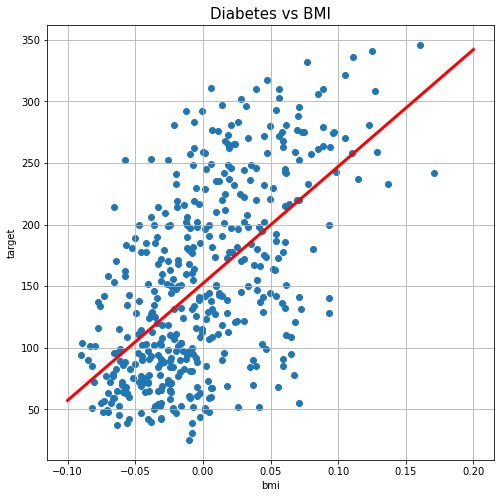

In [37]:
plt.figure(figsize=(8,8))
plt.scatter(df.bmi, df.target)
plt.plot([-0.1,0.2], [-0.1*weight+bias,0.2*weight+bias], 'r-', lw=3)
plt.grid()
plt.xlabel("bmi")
plt.ylabel("target")
plt.title('Diabetes vs BMI', fontsize=15)
plt.show()

-2) train/data set 분리,  test_size0.1

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.1, random_state=2021
    )

In [17]:
lr2 = LinearRegression()
lr2.fit(X_train, y_train)

LinearRegression()

In [18]:
pred = lr2.predict(X_test)

In [19]:
from sklearn.metrics import r2_score
r2_score(X_test, pred)

-13193958.886218492

In [20]:
r2_score(X_test, y_test)

-14099392.81715259

In [21]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
mse, rmse

(3577.1382963531237, 59.809182374892266)

- 당뇨병 VS BP

In [27]:
X = df.bmi.values.reshape(-1,1)
y = diabetes.target
X.shape, y.shape

((442, 1), (442,))

In [31]:
lr3 = LinearRegression()
lr3.fit(X, y)

LinearRegression()

In [30]:
weight, bias = lr.coef_[0], lr.intercept_
rss = lr._residues
weight, bias, rss

(949.4352603839491, 152.1334841628967, 1719581.810773882)

In [33]:
lr3.score(X,y)

0.3439237602253803

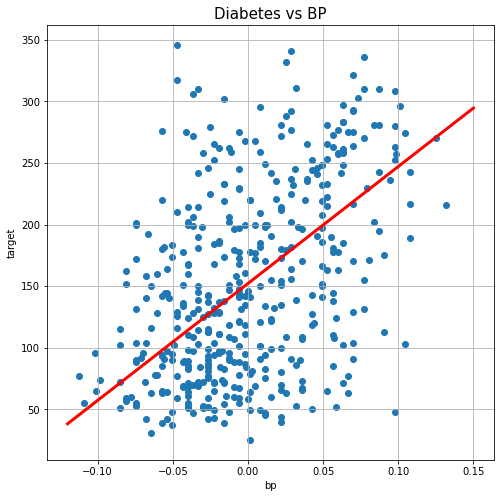

In [36]:
plt.figure(figsize=(8,8))
plt.scatter(df.bp, df.target)
plt.plot([-0.12,0.15], [-0.12*weight+bias,0.15*weight+bias], 'r-', lw=3)
plt.grid()
plt.xlabel("bp")
plt.ylabel("target")
plt.title('Diabetes vs BP', fontsize=15)
plt.show()